In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.decomposition import PCA

#importing metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [63]:
train_df=pd.read_csv("C:\\Users\\2211550\\OneDrive - Cognizant\\Desktop\\Kaggle Assignments\\Week 4\\playground-series-s3e5\\train.csv")

In [64]:
test_df=pd.read_csv("C:\\Users\\2211550\\OneDrive - Cognizant\\Desktop\\Kaggle Assignments\\Week 4\\playground-series-s3e5\\test.csv")

original_df=pd.read_csv("C:\\Users\\2211550\\OneDrive - Cognizant\\Desktop\\Kaggle Assignments\\Week 4\\archive (6)\WineQT.csv")

In [65]:
train_df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [66]:
train_df.columns = train_df.columns.str.replace(' ', '_')
original_df.columns = original_df.columns.str.replace(' ', '_')
test_df.columns = test_df.columns.str.replace(' ', '_')

features = train_df.columns[:-1]

In [67]:
train_df.head(3)

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7


EDA

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed_acidity         2056 non-null   float64
 2   volatile_acidity      2056 non-null   float64
 3   citric_acid           2056 non-null   float64
 4   residual_sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free_sulfur_dioxide   2056 non-null   float64
 7   total_sulfur_dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [69]:
train_df.shape,original_df.shape

((2056, 13), (1143, 13))

In [70]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed_acidity         2056 non-null   float64
 2   volatile_acidity      2056 non-null   float64
 3   citric_acid           2056 non-null   float64
 4   residual_sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free_sulfur_dioxide   2056 non-null   float64
 7   total_sulfur_dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [72]:
train_df.head(5)

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [73]:
train_df.describe()

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [74]:
original_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Label

In [75]:
print('Train')
display(train_df.quality.value_counts(True))

print('\nOriginal')
display(original_df.quality.value_counts(True))

Train


5    0.408074
6    0.378405
7    0.161965
4    0.026751
8    0.018969
3    0.005837
Name: quality, dtype: float64


Original


5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: quality, dtype: float64

## Distributions

The importance of inspecting the distribution of data cannot be overstated, as it provides insight into potential anomalies in the variables and the necessity for preprocessing techniques. The next section will use common plots to show relationships between the features, the target and some discrepancies between synthetic and original dataset.

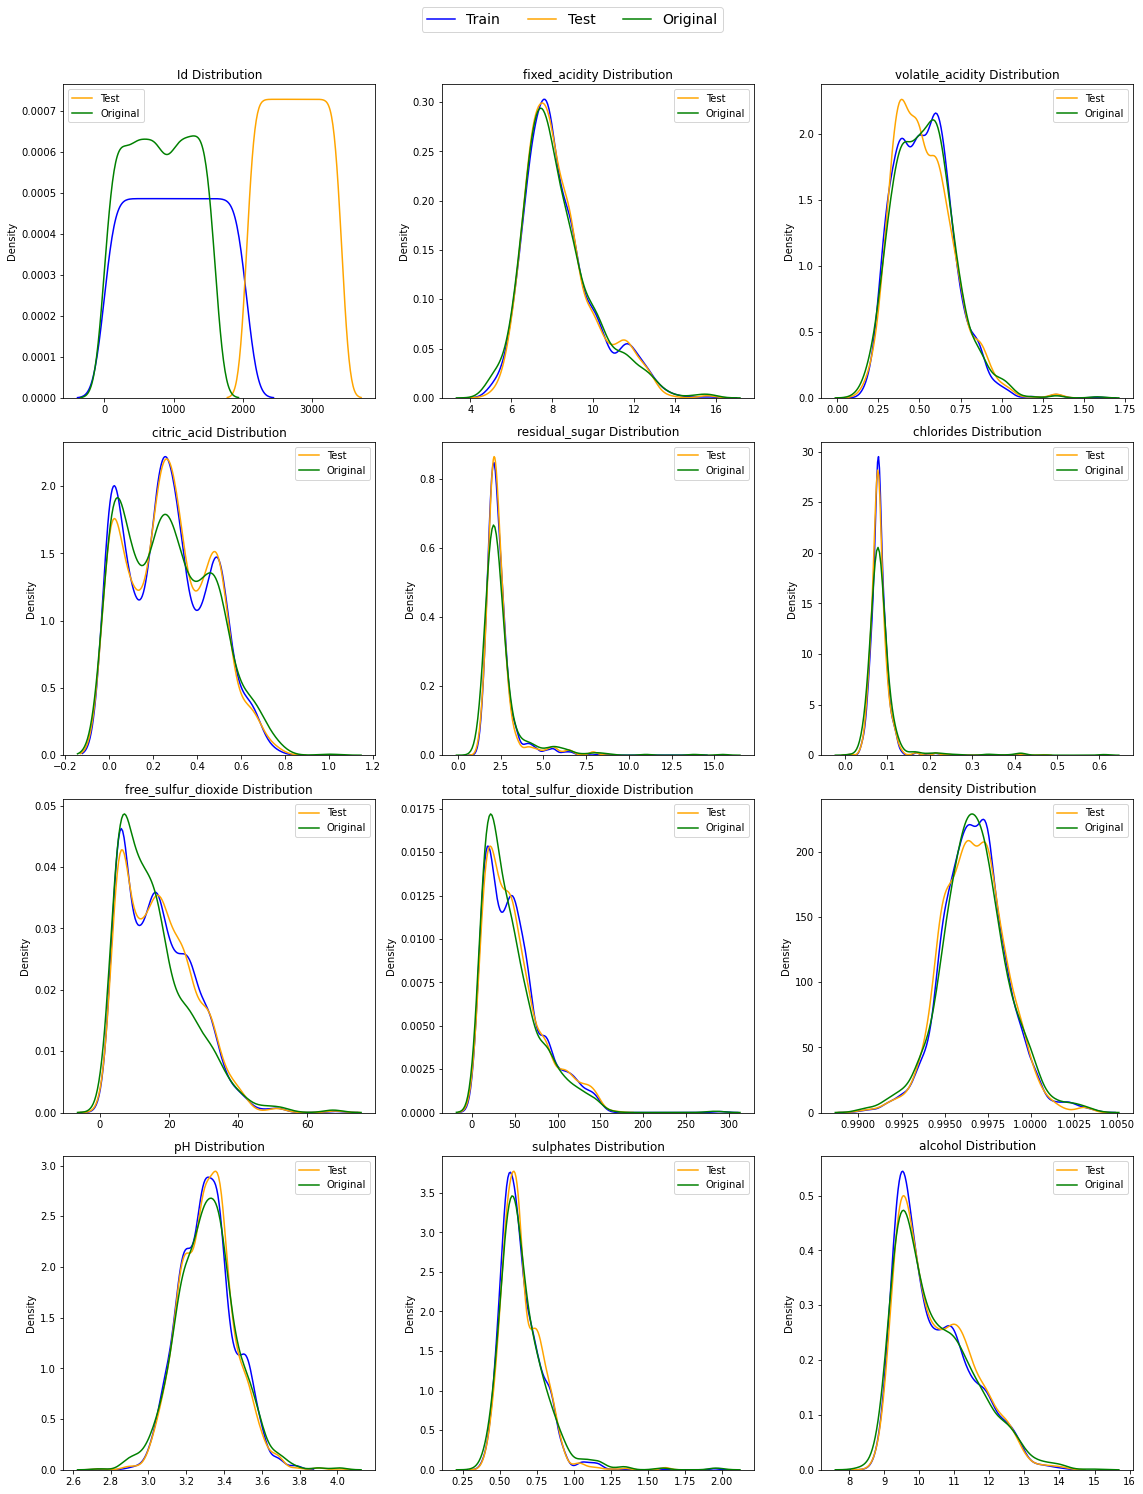

In [76]:
import math

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.kdeplot(train_df[column], label='Train', ax=ax[i], color='blue')
    sns.kdeplot(test_df[column], label='Test', ax=ax[i], color='orange')
    sns.kdeplot(original_df[column], label='Original', ax=ax[i], color='green')
    
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles[1:], labels=labels[1:])
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=3)
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2

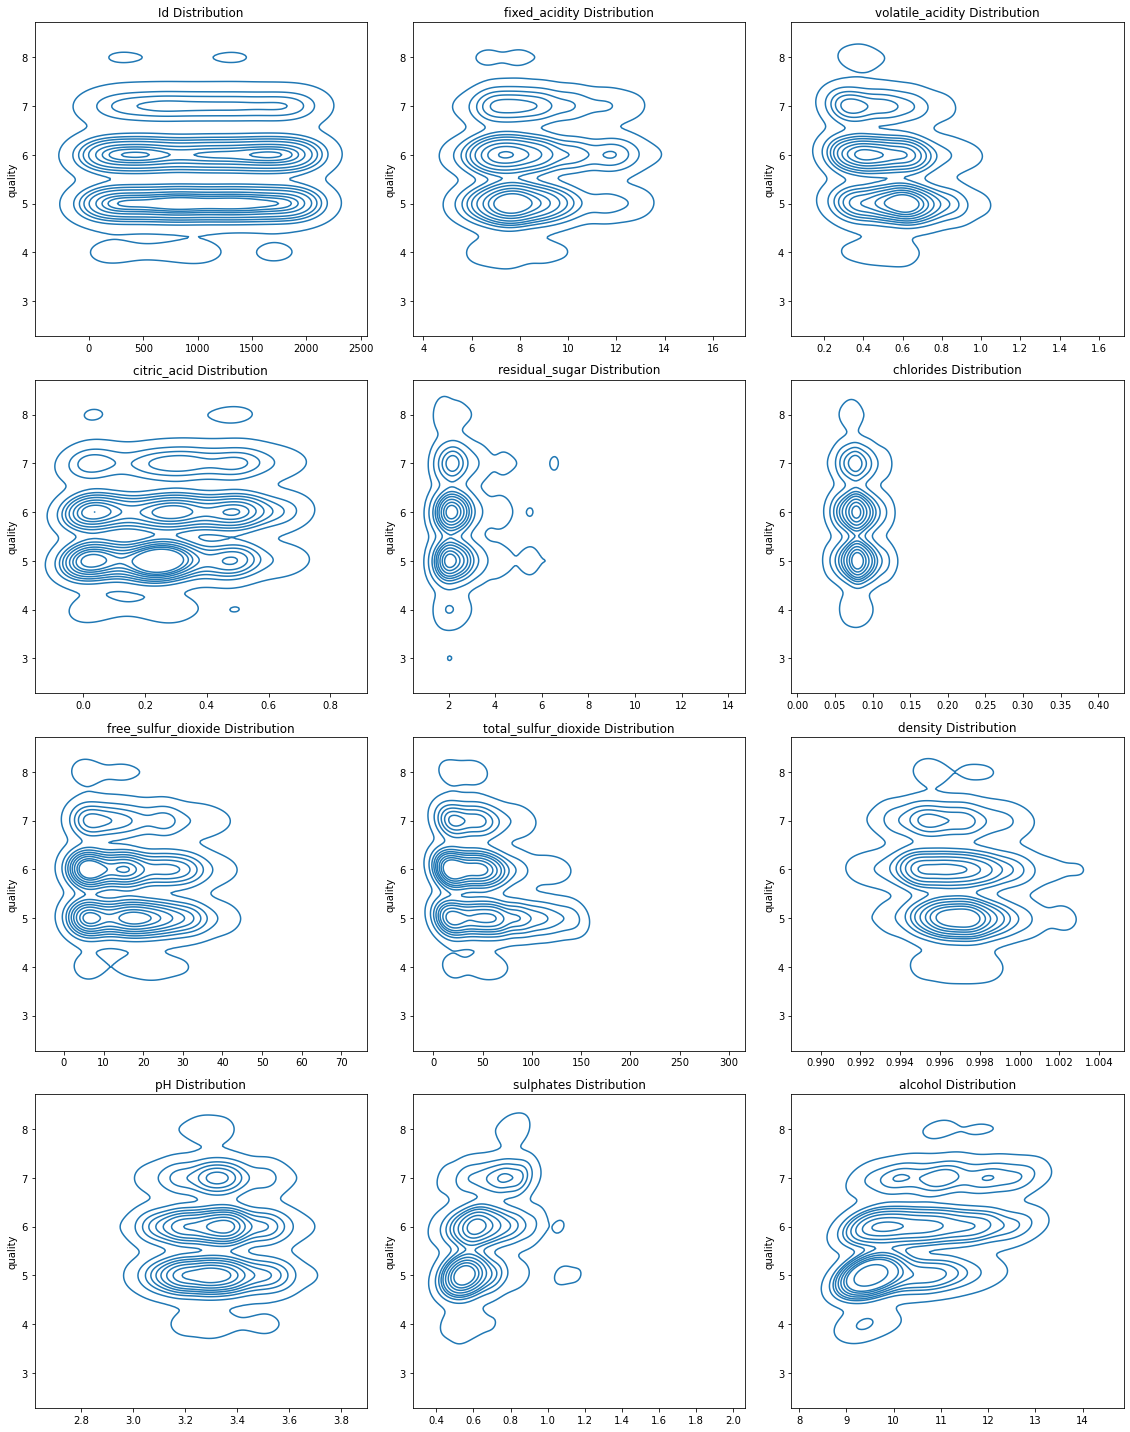

In [77]:
columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.kdeplot(
        data=train_df[column],
        data2=train_df.quality,
        ax=ax[i],
        
        palette="Purples_d")
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()

Train Vs Test vs Original

Insights:

1.At first glance the only discernable difference lies in the distribution of free sulfur dioxide free sulfur dioxide.
On the other hand train and test datasets does not reveal any substantial variations, suggesting that there is no need to 
conduct an extensive adversarial validation..

2.The distributions of Chlorides and residual sugars exhibit a skewed pattern, which may require rectification through the use of the clip function. This technique can be especially beneficial for machine learning models that rely on feature scaling, as it can mitigate the impact of outliers on model performance.

3.Concating original dataset is a good idea in this problem.

Box plots

Boxplots summarize key features of a dataset, including outliers, central tendency, distribution shape, and group comparisons. They are a valuable tool for exploratory data analysis, helping to quickly identify important features of the data.

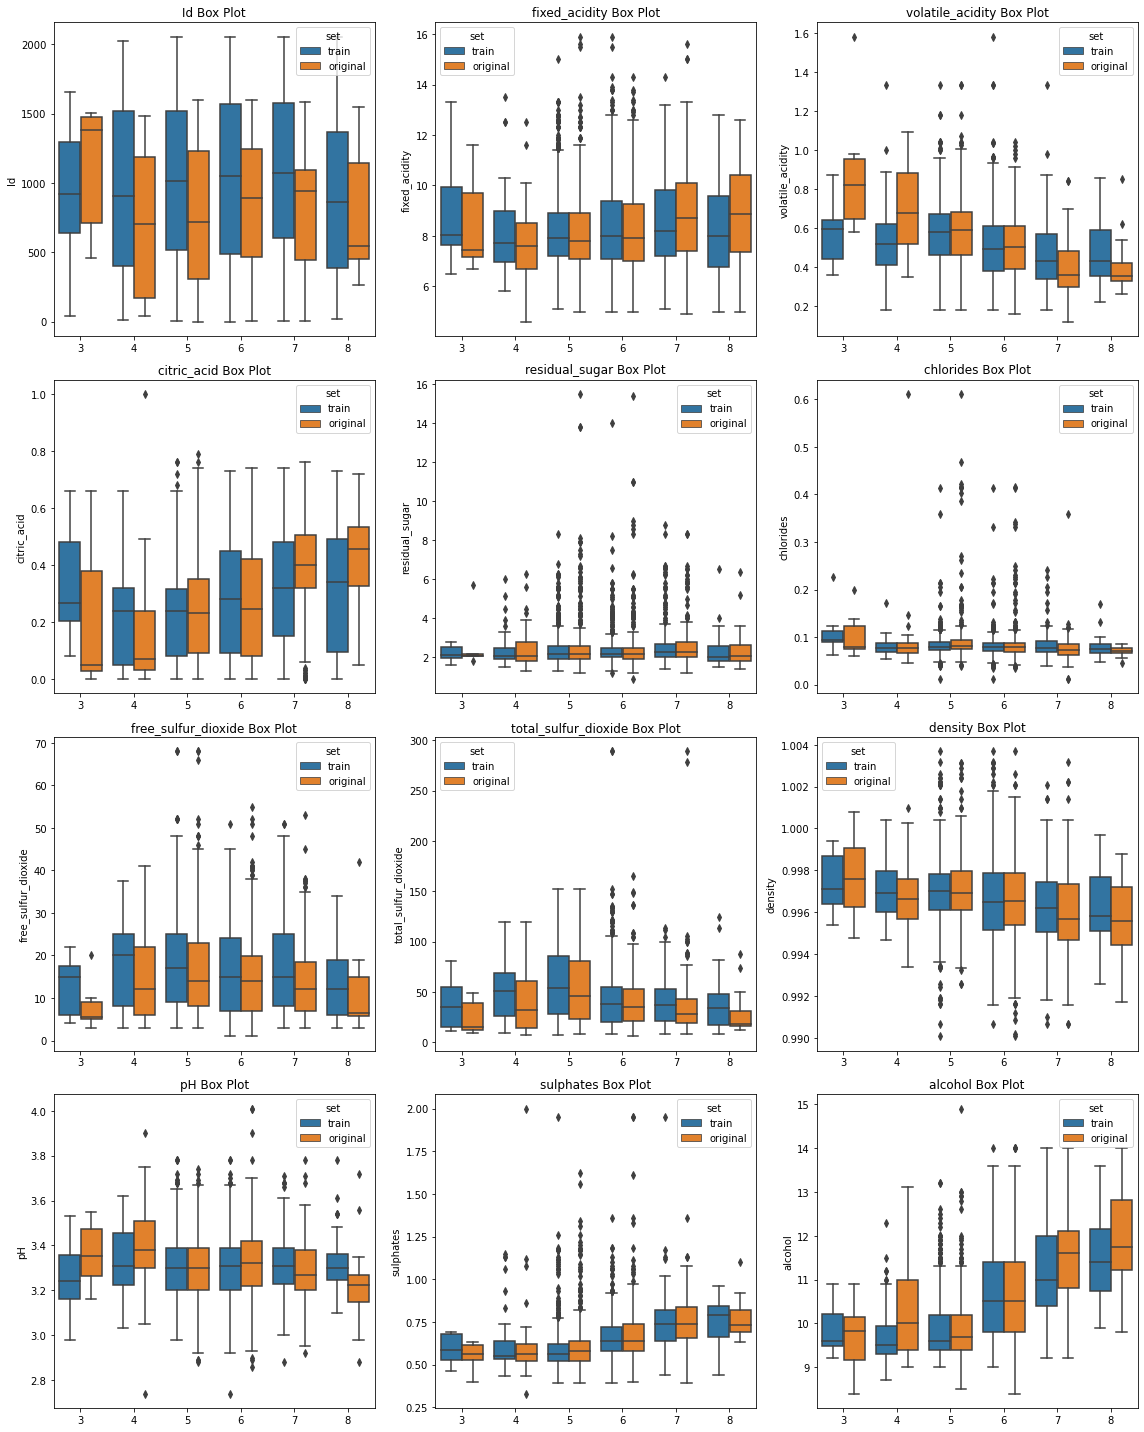

In [79]:
columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

total_df = pd.concat([train_df, original_df], axis=0)
total_df['set'] = 'original'
total_df.iloc[:train_df.shape[0], -1]  = 'train'


for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.boxplot(
        y=total_df[column],
        x=total_df.quality,
        hue=total_df.set,
        ax=ax[i],
    )
    
    # titles
    ax[i].set_title(f'{column} Box Plot');
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
plt.tight_layout()


Outliers

The plot shows the results of counting all records in each group that have a z-score with an absolute value greater than 2, indicating outliers (observations more than 2 standard deviations from the mean).

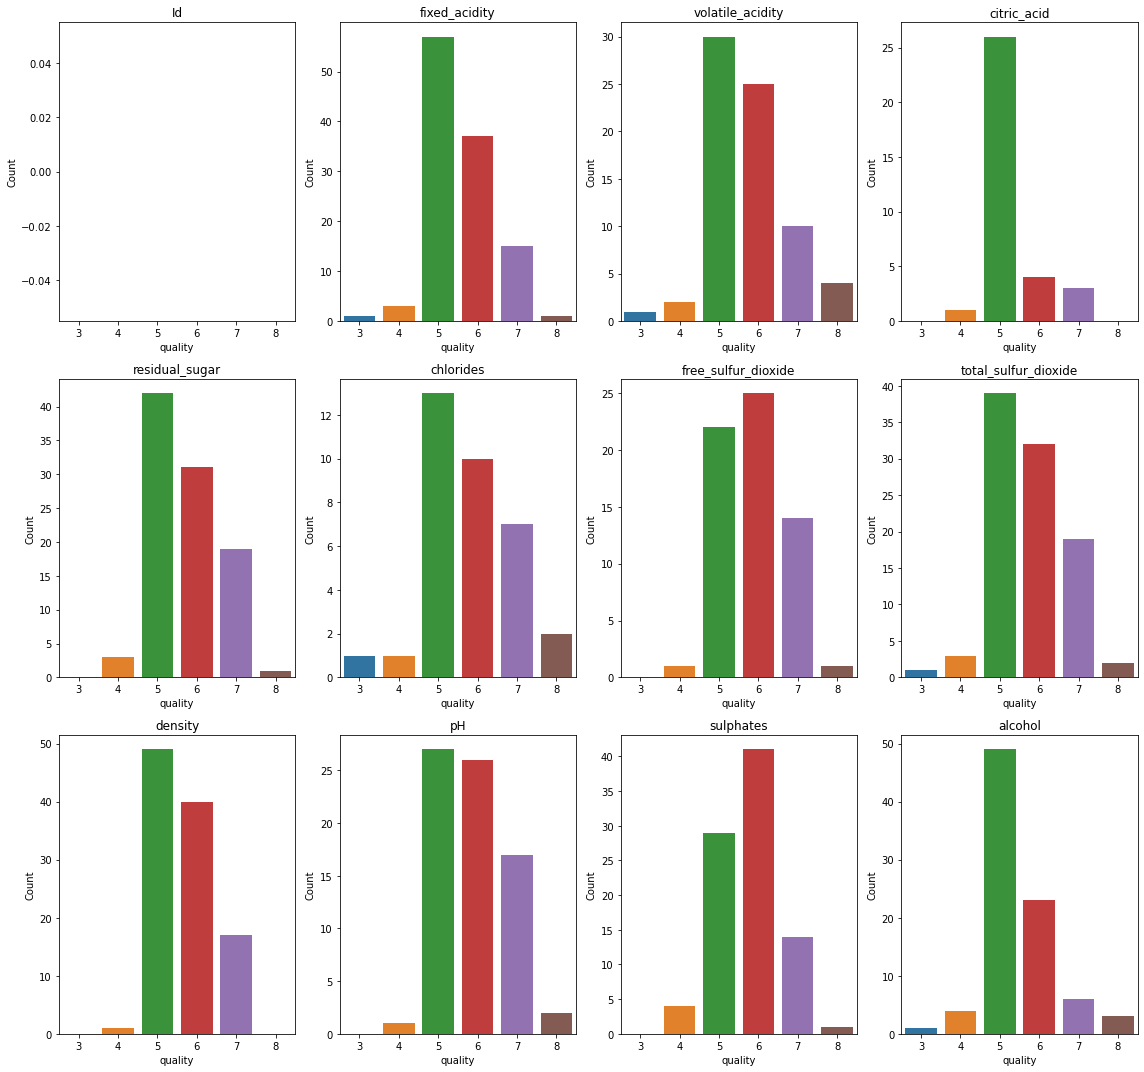

In [82]:
from scipy.stats import zscore

features = train_df.columns[:-1]
z_scores = train_df[features]
z_scores = z_scores.groupby(train_df.quality).apply(zscore)
outliers = z_scores.abs().ge(2).groupby(train_df.quality).sum()

n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.barplot(x=outliers.index, y=outliers[feature], ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title(feature)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
plt.tight_layout()

### Checking for null values

In [83]:
train_null = train_df.isnull().sum().rename('train')
test_null = test_df.isnull().sum().rename('test')
original_null = original_df.isnull().sum().rename('original')

pd.concat([train_null, test_null, original_null], axis=1)

,train,test,original
Id,0,0.0,0
fixed_acidity,0,0.0,0
volatile_acidity,0,0.0,0
citric_acid,0,0.0,0
residual_sugar,0,0.0,0
chlorides,0,0.0,0
free_sulfur_dioxide,0,0.0,0
total_sulfur_dioxide,0,0.0,0
density,0,0.0,0
pH,0,0.0,0


### Correlation

C:\Users\2211550\AppData\Local\Temp\4\ipykernel_12276\3663806007.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1]);


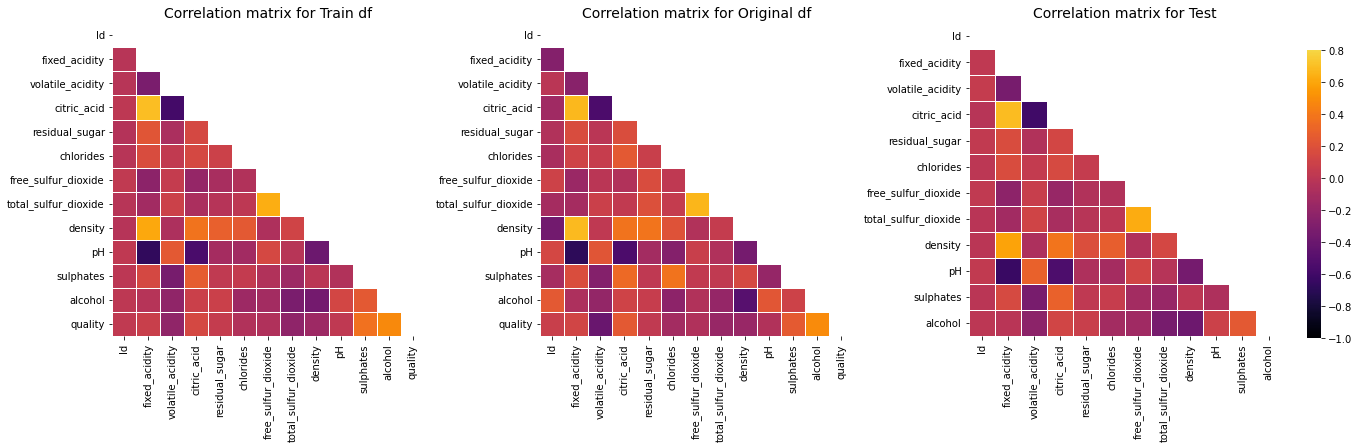

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
float_types = [np.int64, np.float16, np.float32, np.float64]
float_columns = train_df.select_dtypes(include=float_types).columns
cbar_ax = fig.add_axes([.91, .39, .01, .2])

names = ['Train', 'Original']
for i, df in enumerate([train_df, original_df]):
    
    corr = df[float_columns].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(
        corr, mask=mask, cmap='inferno',
        vmax=0.8, vmin=-1,
        center=0, annot=False, fmt='.3f',
        square=True, linewidths=.5,
        ax=ax[i],
        cbar=False,
        cbar_ax=None
    );

    ax[i].set_title(f'Correlation matrix for {names[i]} df', fontsize=14)

df = test_df
float_columns = test_df.select_dtypes(include=float_types).columns
corr = test_df[float_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr, mask=mask, cmap='inferno',
    vmax=0.8, vmin=-1,
    center=0, annot=False, fmt='.3f',
    square=True, linewidths=.5,
    cbar_kws={"shrink":.5, 'orientation':'vertical'},
    ax=ax[2],
    cbar=True,
    cbar_ax=cbar_ax
);
ax[2].set_title(f'Correlation matrix for Test', fontsize=14)
fig.tight_layout(rect=[0, 0, .9, 1]);

### Feature Engineering

To improve the performance of a model it is important to develop good features. To make good feature engineering it is important to perform a good EDA and familiarize yourself with the problem to extract good relationship between the features and the target variable. The insights gained from procedure allows us to create new features that better capture more complex relationships.



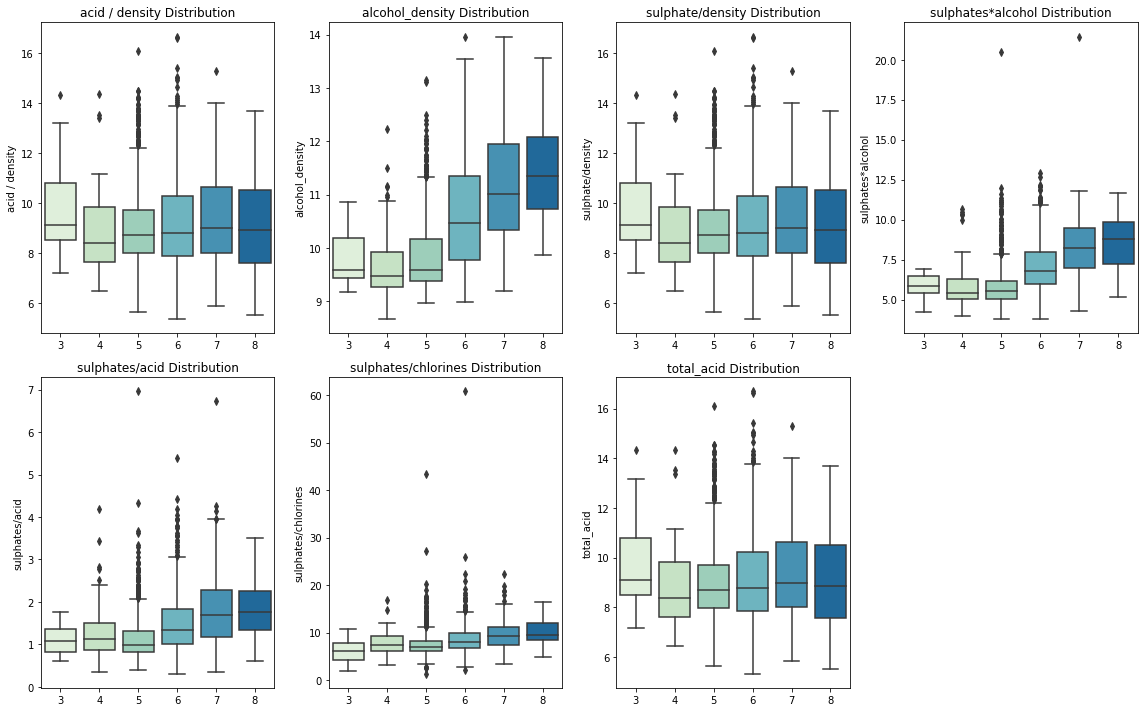

In [85]:
def FE(X):
    X['total_acid'] = X['fixed_acidity'] + X['volatile_acidity'] + X['citric_acid']
    X['acid / density'] = X['total_acid']  / X['density']
    X['alcohol_density'] = X['alcohol']  * X['density']
    X['sulphate/density'] = X['total_acid']  / X['density']
    X['sulphates/acid'] = X['sulphates'] / X['volatile_acidity']
    X['sulphates/chlorines'] = X['sulphates'] / X['chlorides']
    X['sulphates*alcohol'] = X['sulphates'] * X['alcohol']
    return X

X = train_df.copy()
X = FE(X)
new_cols = X.columns.difference(train_df.columns)

columns = new_cols
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.boxplot(
        y=X[column],
        x=X.quality,
        ax=ax[i],
        palette="GnBu"
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()

In [87]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Basic Model

In [89]:
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from colorama import Fore,Style
from datetime import datetime,timedelta

cv = StratifiedKFold(5, shuffle=True, random_state=42)
X = train_df[features]
y = train_df.quality
timedel=timedelta()
kappas = []
test_preds = []
models = []
oof_preds = pd.Series(0, index=train_df.index)
start=time.time()

for fold, (tr_ix, vl_ix) in enumerate(cv.split(train_df, train_df.quality)):
    start_fold = time.time()
    X_tr, y_tr = X.loc[tr_ix].copy(), y.loc[tr_ix]
    X_vl, y_vl = X.loc[vl_ix].copy(), y.loc[vl_ix]
    
    # concat orginal df
    X_tr = pd.concat([X_tr, original_df[features]])
    y_tr = pd.concat([y_tr, original_df.quality])
    
    X_tr = FE(X_tr)
    X_vl = FE(X_vl)
    
    model = LGBMClassifier(max_depth=4, random_state=42, class_weight='balanced')
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_vl)
    oof_preds.iloc[vl_ix] = y_pred
    kappas.append(cohen_kappa_score(y_vl, y_pred, weights='quadratic'))
    models.append(model)
    
    
    
print(f'Mean Quadratic Kappa:  {Fore.GREEN}{np.mean(kappas)}{Style.RESET_ALL}')

Mean Quadratic Kappa:  0.4955924352325026


In [90]:
from lightgbm import LGBMRegressor
import scipy as sp
from functools import partial

qwk = partial(cohen_kappa_score, weights='quadratic')
class LGBMRegressorWithRounder(LGBMRegressor):
    '''
    A light wrapper over LGBMRegressor to deal with the usual problems.
    '''
    def _kappa_loss(self, coef, X, y):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 3
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 4
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 5
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 6
            elif pred >= coef[3] and pred < coef[4]:
                X_p[i] = 7
            else:
                X_p[i] = 8

        ll = qwk(y, X_p)
        return -ll
    
    def fit(self, X, y, **params):
        super().fit(X, y, **params)
        X_pred = super().predict(X)
        loss_partial = partial(self._kappa_loss, X=X_pred, y=y)
        # a little bit of wobble
        initial_coef = list(
            np.array([3.5, 4.5, 5.5, 6.5, 7.5])
        )
        self.round_coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')
        return self
    
    def set_params(self, **params):
        self.round_coef_ = None
        
    def predict_discrete(self, X):
        coef = self.coefficients()
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 3
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 4
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 5
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 6
            elif pred >= coef[3] and pred < coef[4]:
                X_p[i] = 7
            else:
                X_p[i] = 8
        return X_p.astype('int')

    def coefficients(self):
        return self.round_coef_['x']
    
    def predict(self, X):
        X_pred = super().predict(X)
        return self.predict_discrete(X_pred)

### Regressor Baseline

In [91]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)
X = train_df[features]
y = train_df.quality

kappas = []
test_preds = []
models = []
oof_preds = pd.Series(0, index=train_df.index)


for fold, (tr_ix, vl_ix) in enumerate(cv.split(train_df, train_df.quality)):
    
    X_tr, y_tr = X.loc[tr_ix], y.loc[tr_ix]
    X_vl, y_vl = X.loc[vl_ix], y.loc[vl_ix]
    
    # concat orginal df
    X_tr = pd.concat([X_tr, original_df[features]])
    y_tr = pd.concat([y_tr, original_df.quality])
    
    X_tr = FE(X_tr)
    X_vl = FE(X_vl)
    
    model = LGBMRegressorWithRounder(max_depth=4, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_vl)
    oof_preds.iloc[vl_ix] = y_pred
    kappas.append(cohen_kappa_score(y_vl, y_pred, weights='quadratic'))
    models.append(model)
    
    print('_' * 30)
    print(f'Fold: {fold}')
    print(f'Quadratic Kappa  : ', kappas[-1])
    
    print()
    
print(f'Mean Quadratic Kappa:  {Fore.GREEN}{np.mean(kappas)}{Style.RESET_ALL}')

______________________________
Fold: 0
Quadratic Kappa  :  0.5389299997397436

______________________________
Fold: 1
Quadratic Kappa  :  0.5433715220949265

______________________________
Fold: 2
Quadratic Kappa  :  0.5081061209484712

______________________________
Fold: 3
Quadratic Kappa  :  0.5450472779316231

______________________________
Fold: 4
Quadratic Kappa  :  0.5419427008886957

Mean Quadratic Kappa:  0.535479524320692


### Confusion_Matrix

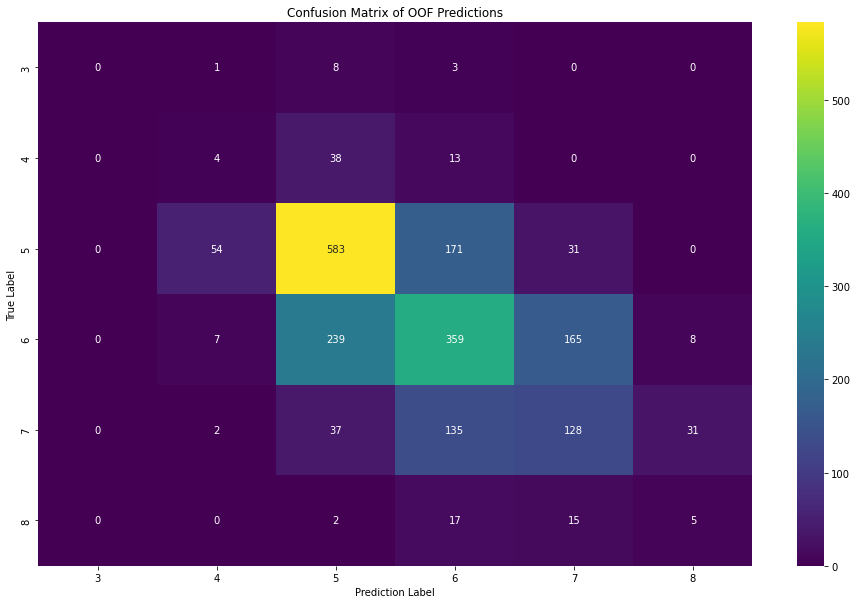

In [92]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(
    confusion_matrix(train_df.quality, oof_preds),
    annot=True,
    cmap='viridis',
    fmt='',
    ax=ax
);

qualities = np.sort(train_df.quality.unique())
ax.set_xticklabels(qualities)
ax.set_yticklabels(qualities)
ax.set_ylabel('True Label')
ax.set_xlabel('Prediction Label')
ax.set_title('Confusion Matrix of OOF Predictions');

LGBM is making lots of mistakes trying to separate class 5 from class 6, we could just train a model to separate this two classe and use it in a second step stacking. Class 3 is incorrectly classified all the times.